**Name : Pratiksha Yadav**

**Dataset : Black Friday Sales**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objs as go

sns.set_style("darkgrid")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/black-friday-sales-eda/train.csv


# Dataset

In [2]:
df=pd.read_csv("/kaggle/input/black-friday-sales-eda/train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Statistics

Check basic statistics of dataset

In [3]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [4]:
print('Shape of Dataframe:',df.shape)

Shape of Dataframe: (550068, 12)


Check for Unique values in the data

In [5]:
for i in df.columns:
    print(f'{i}')
    print(df[i].value_counts())
    print('*'*25)
#     print('\n')

User_ID
User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: count, Length: 5891, dtype: int64
*************************
Product_ID
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64
*************************
Gender
Gender
M    414259
F    135809
Name: count, dtype: int64
*************************
Age
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64
*************************
Occupation
Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15  

# Preprocessing

Check for missing values in the data

In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

check for duplicate data

In [7]:
df.duplicated().sum()

0

Rename columns

In [8]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [9]:
df.rename(columns={'User_ID':'UserID','Product_ID':'ProductID',
                   'Product_Category_1':'Product1','Product_Category_2':'Product2',
                   'Product_Category_3':'Product3','Stay_In_Current_City_Years':'City'},inplace=True)
df.head()

,UserID,ProductID,Gender,Age,Occupation,City_Category,City,Marital_Status,Product1,Product2,Product3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Drop unnecessary fields

In [10]:
df.drop('ProductID', axis=1, inplace=True)

In [11]:
df.head(7)

,UserID,Gender,Age,Occupation,City_Category,City,Marital_Status,Product1,Product2,Product3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,M,46-50,7,B,2,1,1,8.0,17.0,19215


Convert categorical data into integer using map function (e.g 'Gender' column)

In [12]:
df.Gender = df.Gender.map({'F':0,'M':1})
df['Gender'].head()

0    0
1    0
2    0
3    0
4    1
Name: Gender, dtype: int64

map range variables into integers (e.g 'Age' column)

In [13]:
df.Age.unique()
df.Age = df.Age.map({'0-17':0,'18-25':1,'26-35':2,'36-45':2,'46-50':3,'51-55':3,'55+':4}).astype(int)

In [14]:
df['Age']

0         0
1         0
2         0
3         0
4         4
         ..
550063    3
550064    2
550065    2
550066    4
550067    3
Name: Age, Length: 550068, dtype: int64

In [15]:
df.groupby('Age')['Product2'].agg(pd.Series.mode)

Age
0    4.0
1    8.0
2    8.0
3    8.0
4    8.0
Name: Product2, dtype: float64

In [16]:
s = df.groupby('Age')['Product2'].agg(pd.Series.mode)
for i in s.index:
    df.loc[(df['Age']==i) & (df['Product2'].isnull()), 'Product2'] = s[i]

In [17]:
s = df.groupby('Age')['Product3'].agg(pd.Series.mode)
for i in s.index:
    df.loc[(df['Age']==i) & (df['Product3'].isnull()), 'Product3'] = s[i]

<Axes: >

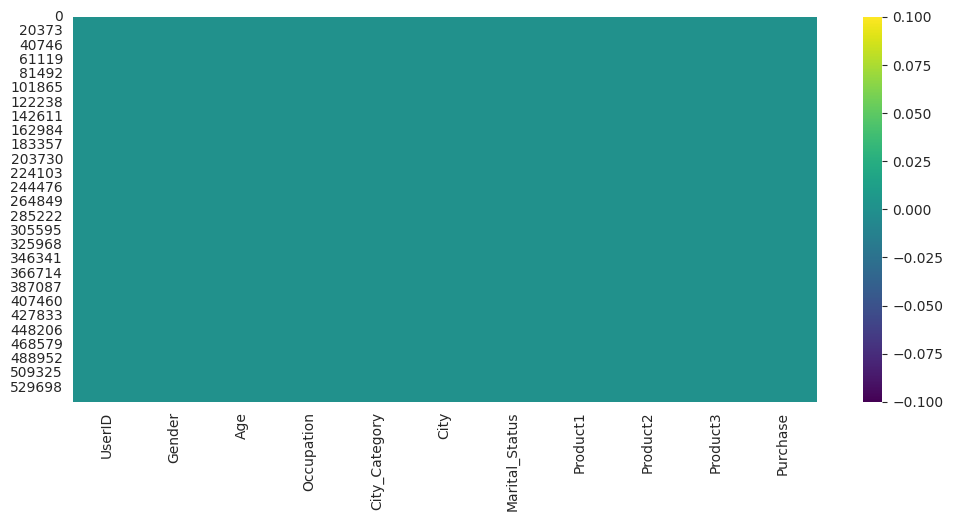

In [18]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(),cmap='viridis')

check outliers

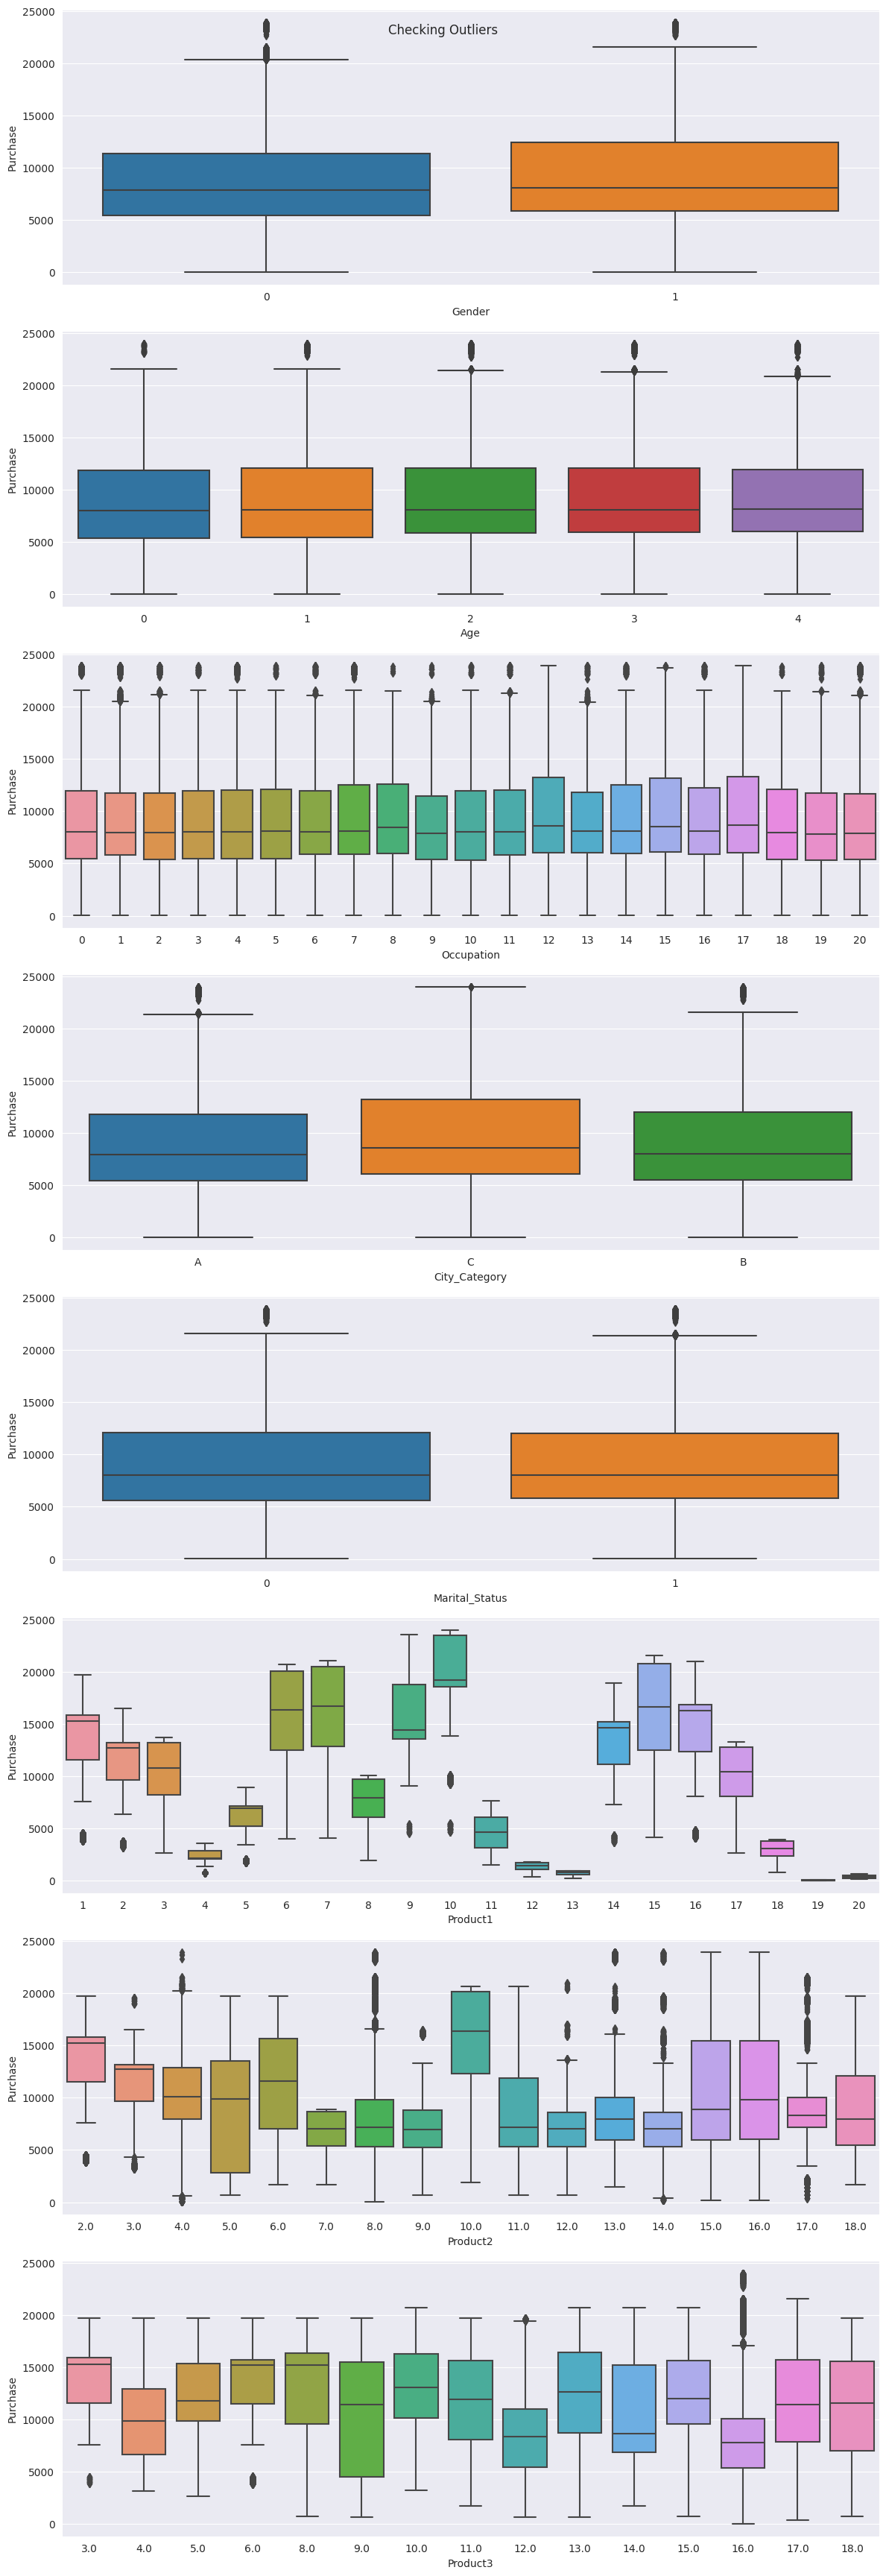

In [19]:
def outliers(list1):
    fig,axes = plt.subplots(nrows=len(list1), ncols=1, figsize=(12,35)) 
    fig.suptitle('Checking Outliers') 
    for i,j in enumerate(list1):
        sns.boxplot(ax=axes[i],data= df,x = j,y='Purchase')
    plt.tight_layout()
        
list1= ['Gender','Age','Occupation','City_Category','Marital_Status','Product1','Product2','Product3']

outliers(list1)

# Data Visualisation

Purchase Distribution

<Axes: xlabel='Purchase', ylabel='Density'>

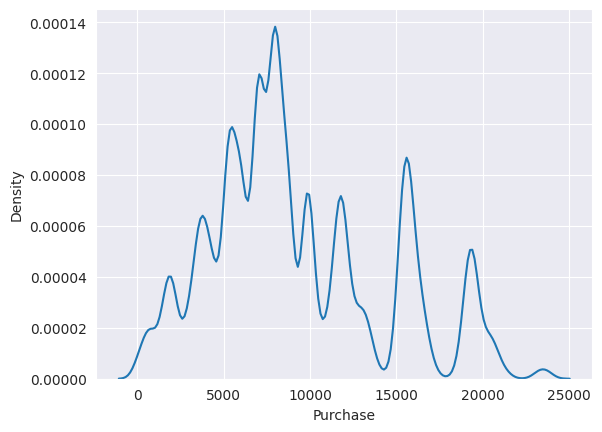

In [20]:
sns.kdeplot(x='Purchase',data=df)

<Axes: xlabel='Gender', ylabel='count'>

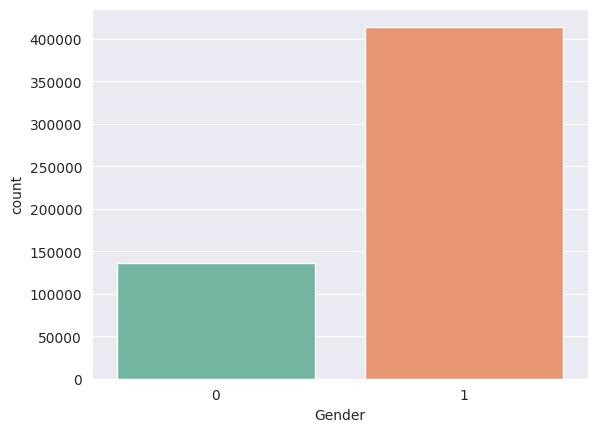

In [21]:
sns.countplot(x='Gender',data=df,palette='Set2')

visualize individual column

In [22]:
df['Age'].value_counts().sort_values(key = lambda x : x.index).index

Index([0, 1, 2, 3, 4], dtype='int64', name='Age')

<Figure size 1000x800 with 0 Axes>

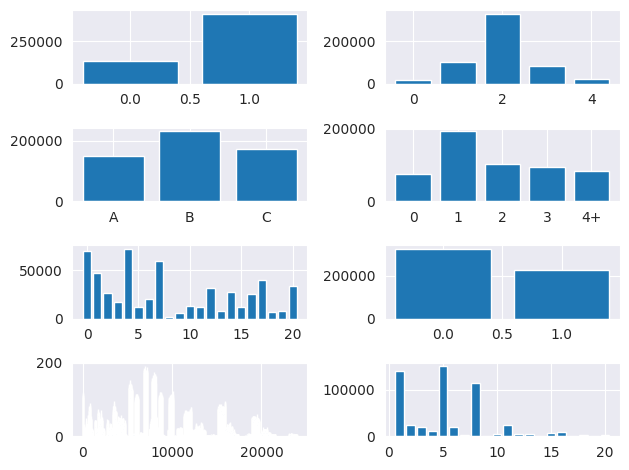

In [23]:
# by loop 
l = 'Gender, Age, City_Category, City, Occupation, Marital_Status, Purchase, Product1'.split(', ')

plt.figure(figsize=(10,8))

fig, axes = plt.subplots(nrows = 4 , ncols = 2)

i = 0
for ax in axes:
    for a in ax:
        res = df[l[i]].value_counts().sort_values(key = lambda x : x.index)
        a.bar(res.index, res.values)
        i+=1
        
plt.tight_layout()

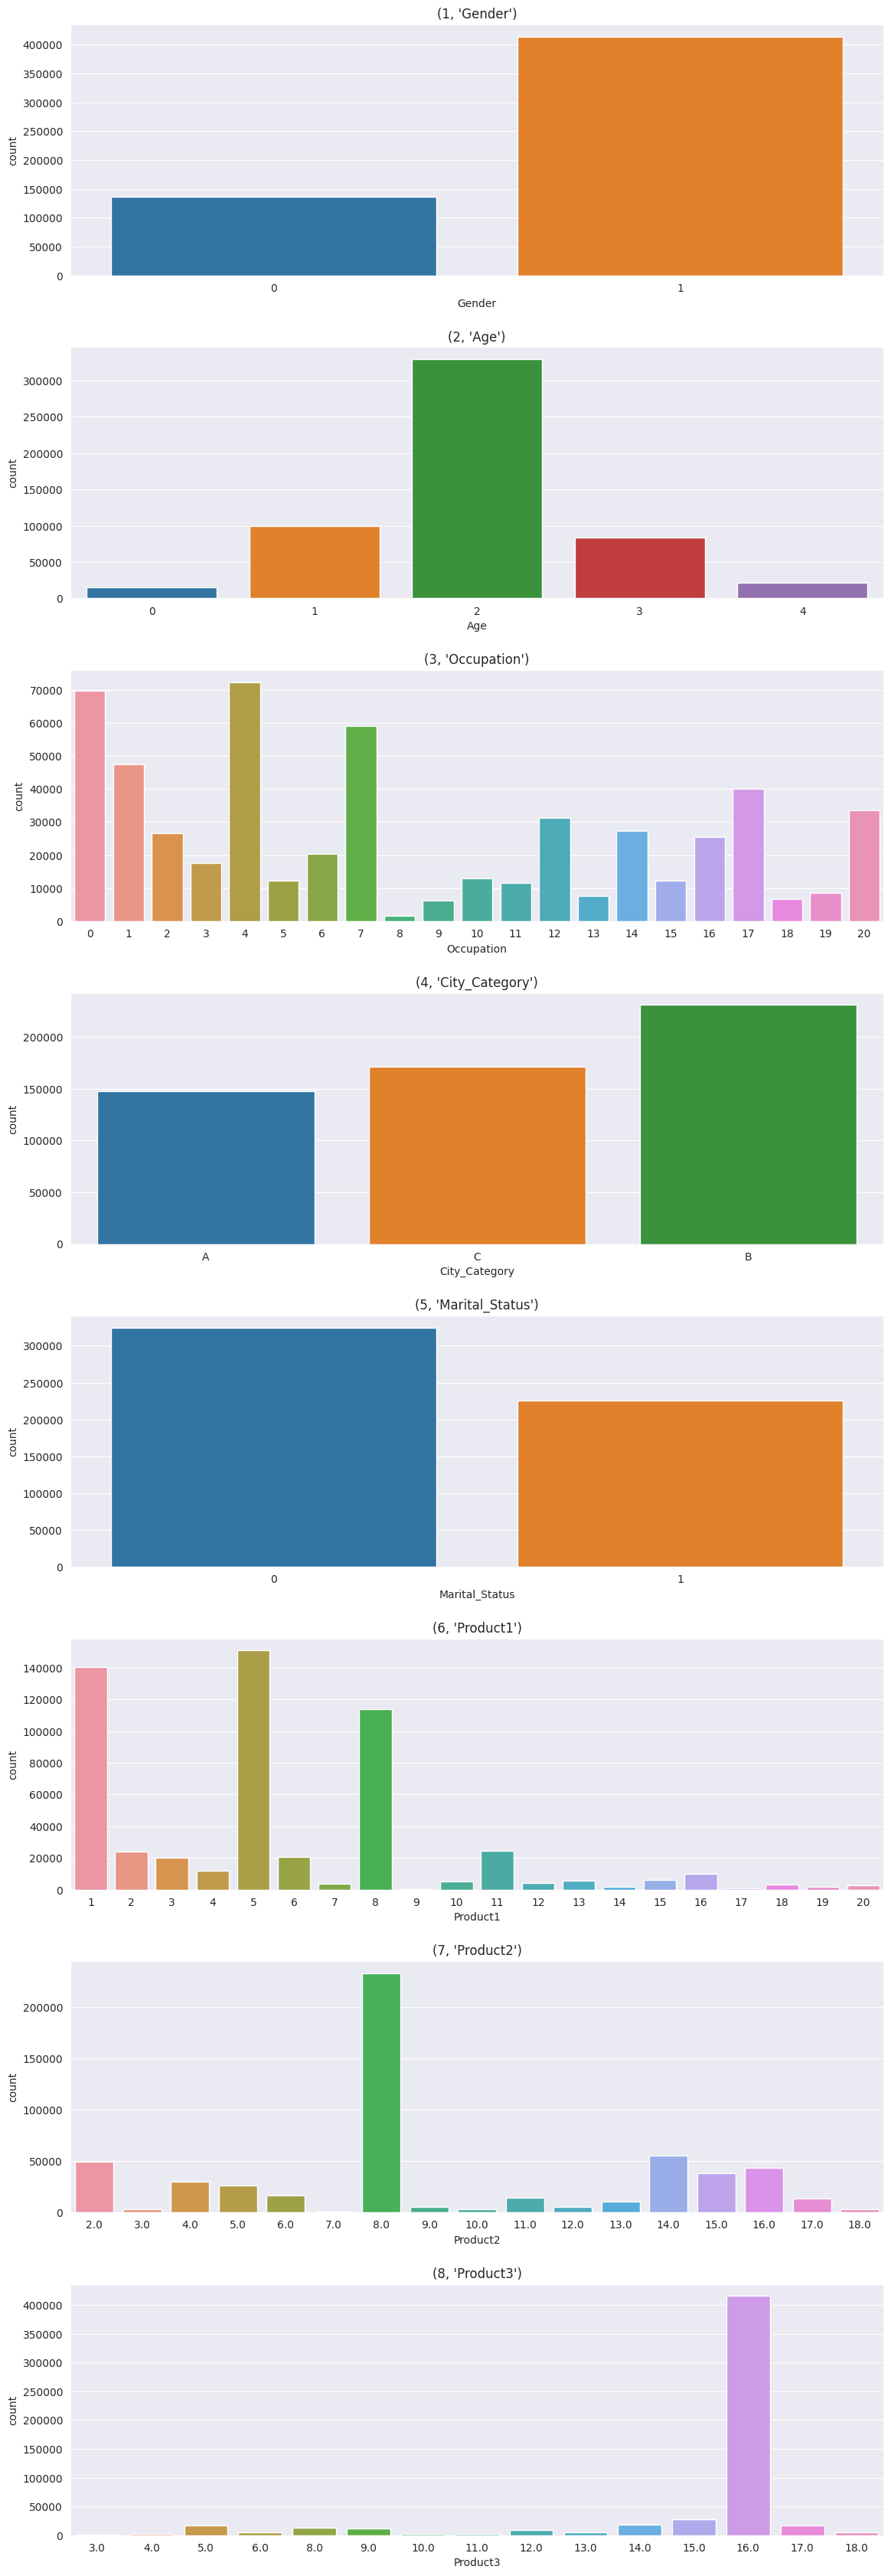

In [24]:
def single_col(list1):
    
    fig,axes=plt.subplots(nrows=len(list1),ncols=1,figsize=(12,34))
    
    for i in enumerate(list1):  
        s = sns.countplot(ax=axes[i[0]],x=df[i[1]])
        s.set_title((i[0]+1,i[1]))
        
    plt.tight_layout(pad=2)
list1= ['Gender','Age','Occupation','City_Category','Marital_Status','Product1','Product2','Product3']
single_col(list1)

**Countplot**

  1. 'Gender' :
    As per  the plot Male data are far more than Female data
  2. 'Age' :
    Here you can observed that the age range between 26 to 35 are more than other age group
  3. 'Occupation' : 
    most customers having occupation 4,0 and 7
  4. 'City_Category' : 
    most of the customers are from City Category B 
  5. 'Marital_Status' :  
    most of the customers are married
  6. 'Product1' :
    mostly the product purchase in Product1 are from 5,1 and 8
  7. 'Product2' :
    highest selling in Product2 is 8 
  8. 'Product3' :
    16 is highest selling product category as compare ith other product category

<Axes: title={'center': 'Female Purchase Distribution'}, xlabel='Purchase', ylabel='Density'>

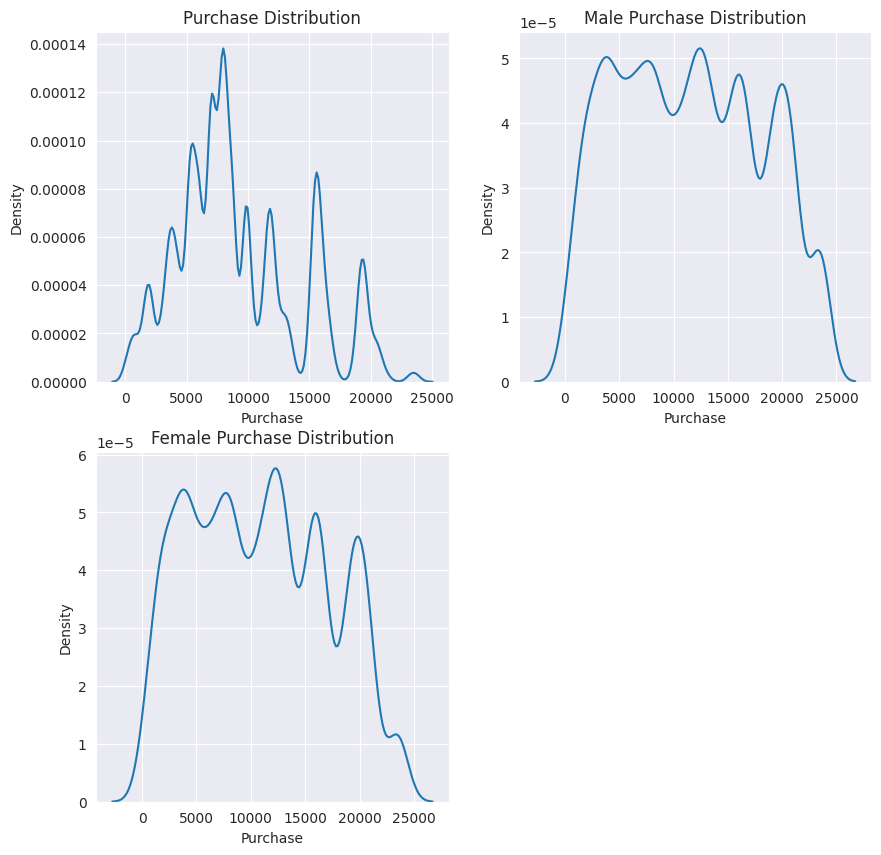

In [25]:
# purchase distribution
male = df[df['Gender'] == 1].value_counts('Purchase')
female = df[df['Gender'] == 0].value_counts('Purchase')

plt.figure(figsize=(10,10),dpi=100);
plt.subplot(2,2,1)
plt.title('Purchase Distribution')
sns.kdeplot(x='Purchase',data=df)

plt.subplot(2,2,2)
plt.title('Male Purchase Distribution')
sns.kdeplot(x='Purchase',data=male)

plt.subplot(2,2,3)
plt.title('Female Purchase Distribution')
sns.kdeplot(x='Purchase',data=female)

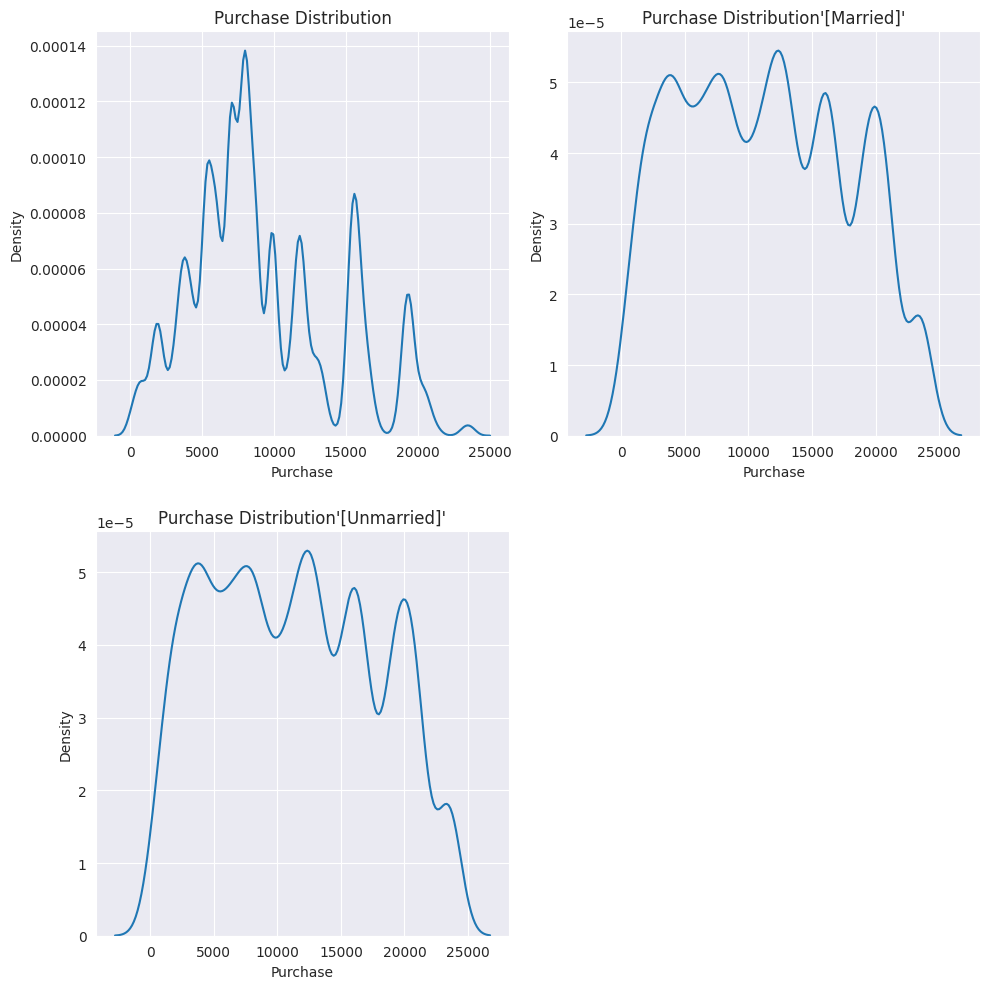

In [26]:
# purchase distribution with respect to Marital Status
married = df[df['Marital_Status'] == 1].value_counts('Purchase')
unmarried = df[df['Marital_Status'] == 0].value_counts('Purchase')
plt.figure(figsize=(10,10),dpi=100);
plt.subplot(2,2,1)
plt.title('Purchase Distribution')
sns.kdeplot(x='Purchase',data=df)

plt.subplot(2,2,2)
plt.title("Purchase Distribution'[Married]'")
sns.kdeplot(x='Purchase',data=married)

plt.subplot(2,2,3)
plt.title("Purchase Distribution'[Unmarried]'")
sns.kdeplot(x='Purchase',data=unmarried)

plt.tight_layout()

Plot Purchase vs other columns by mean and count

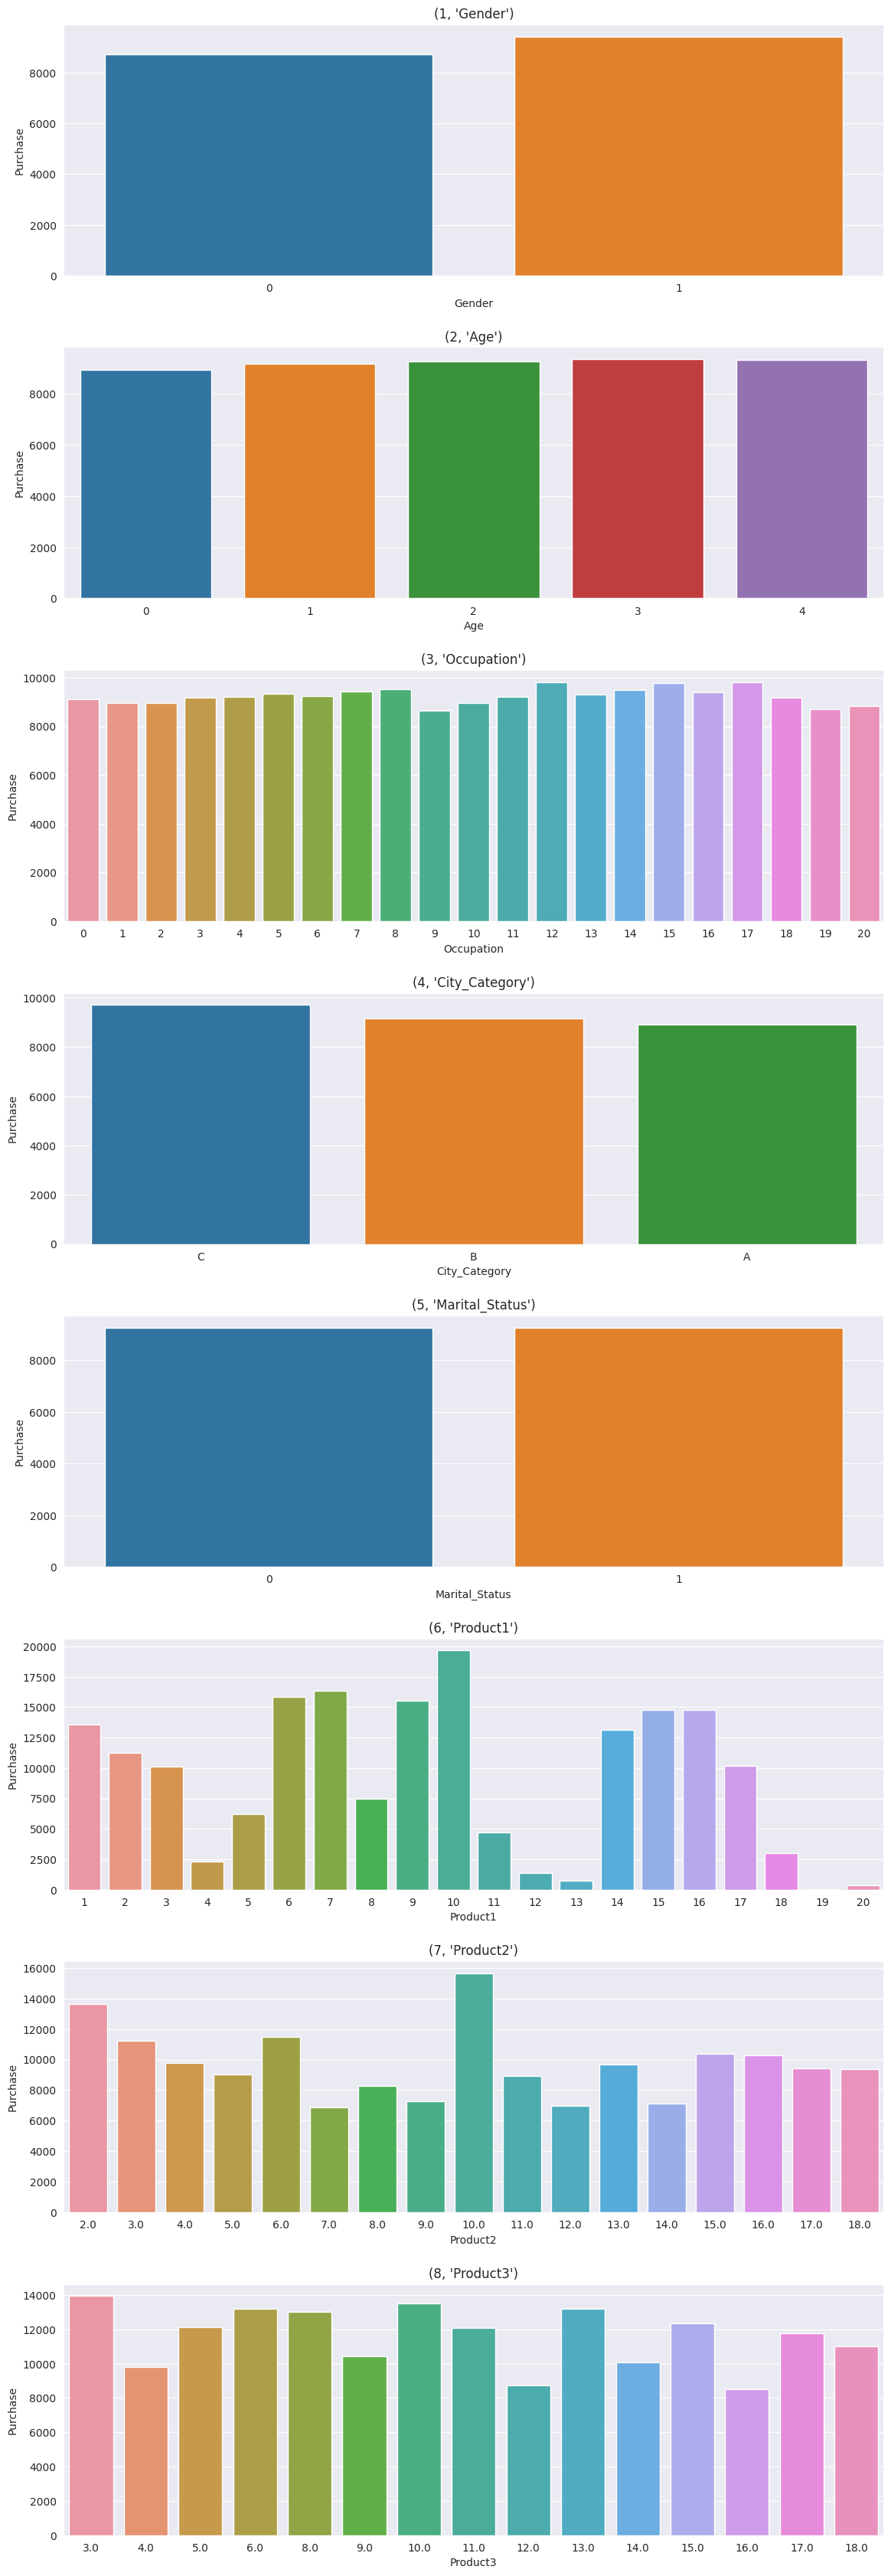

In [27]:
def plot_purchase(list1,ans,operation):
    
    fig,axes=plt.subplots(nrows=len(list1),ncols=1,figsize=(12,34))
    
    for l,var in zip(enumerate(list1),ans):
        var = df.groupby(l[1]).agg({'Purchase':operation}).sort_values(by='Purchase',ascending= False)
#         display(var)
        s = sns.barplot(ax=axes[l[0]],data=var,x=var.index,y='Purchase')
        s.set_title((l[0]+1,l[1]))
     
    plt.tight_layout(pad=2)
list1= ['Gender','Age','Occupation','City_Category','Marital_Status','Product1','Product2','Product3']
ans= ['gen_g','age_g','occ_g','city_g','marital_g','cate1','cate2','cate3']

plot_purchase(list1,ans,'mean')

As per the above plot observation: (by taking Mean of Purchase)

  1. 'Gender':
      Male customers purchase more   
  2. 'Age': 
      Age group 51-55 purchase more expensive product      
  3. 'Occupation': 
      Occupation 12,15 and 17 purchase more      
  4. 'City_Category': 
      City Category 'C' purchase amount are      more than other two City     
  5. 'Marital_Status': 
      Married & unmarried people both purchased amount are approx same      
  6. 'Product_Category_1': 
      10 is most purchased product category in Product_Category_1     
  7. 'Product_Category_2':      
      10 is most purchased product category in Product_Category_2 
  8. 'Product_Category_3': 
      3 is most purchased product category in Product_Category_3

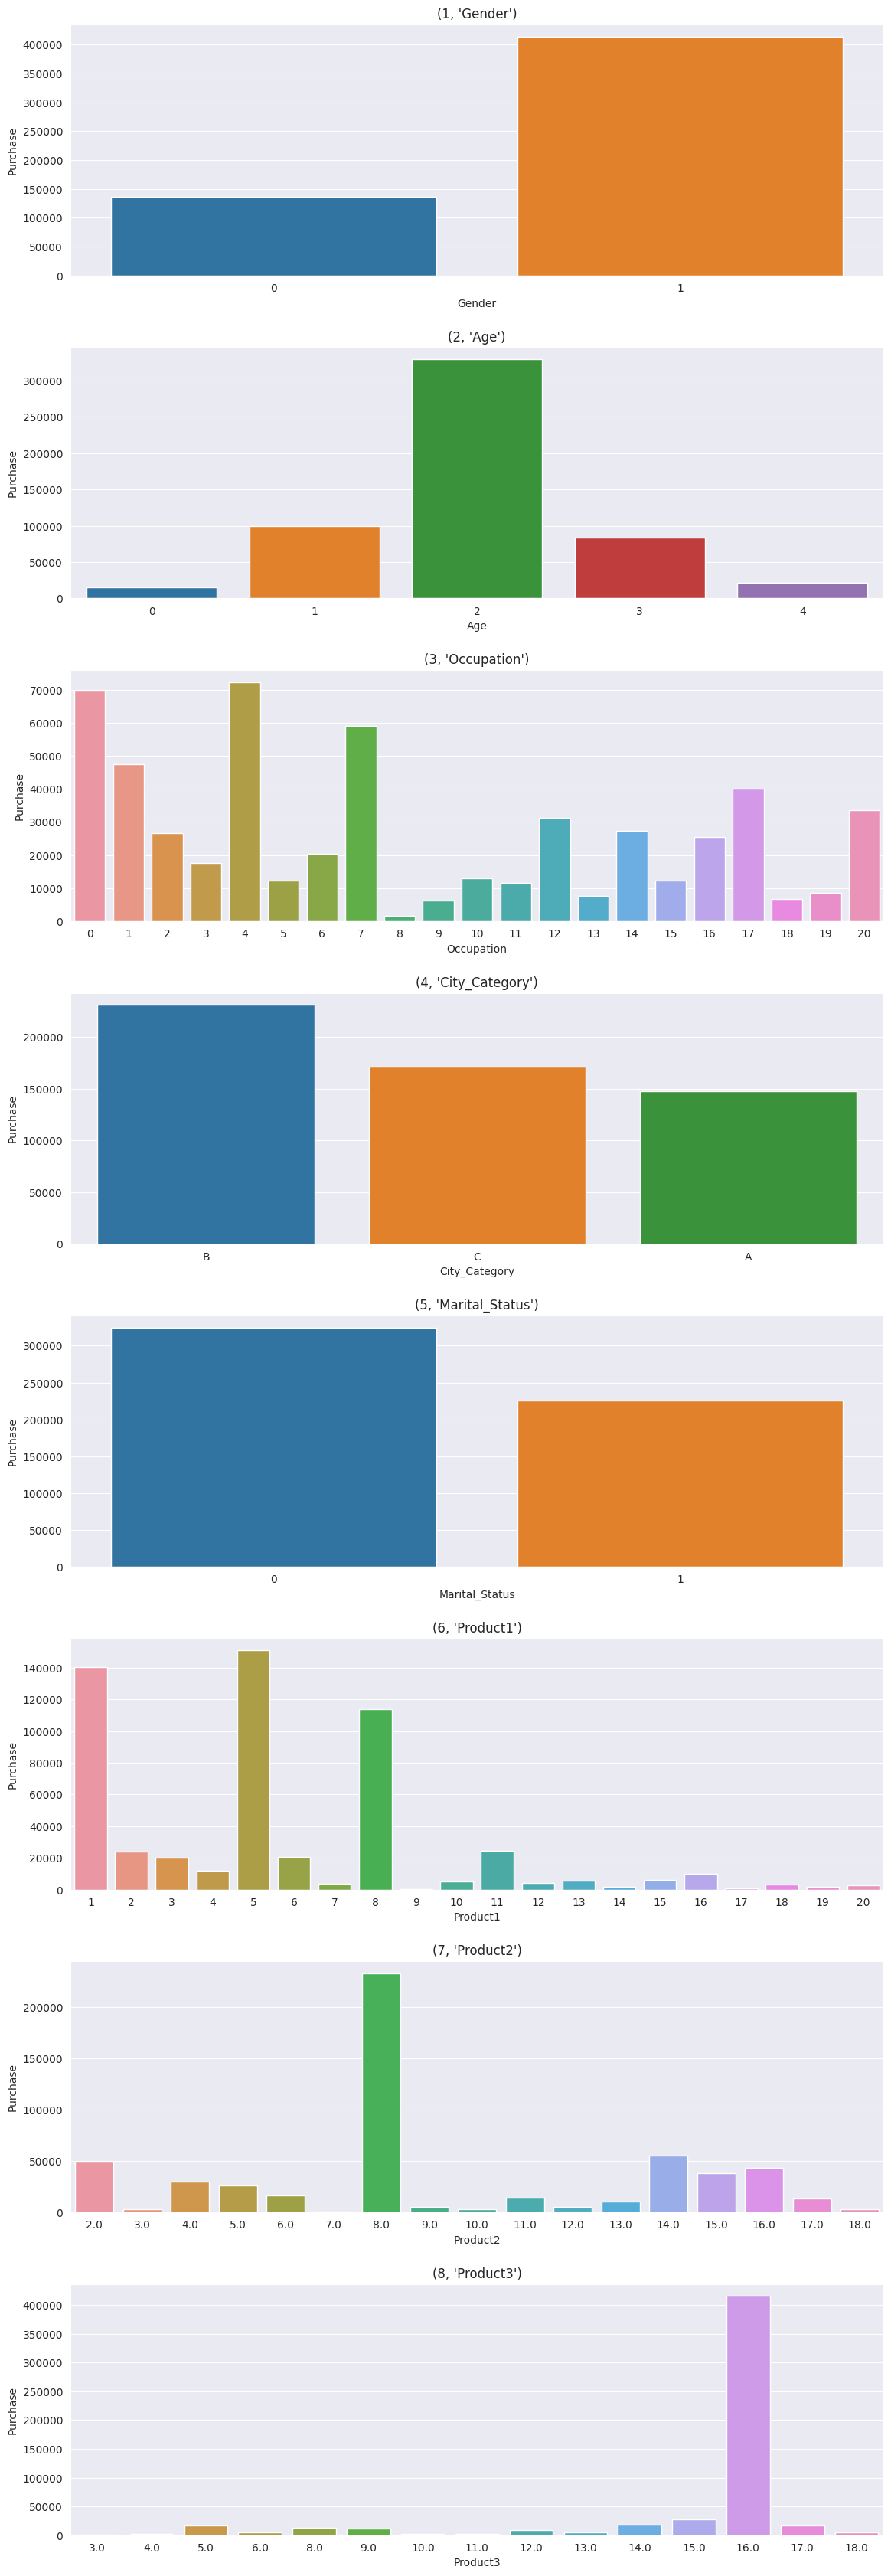

In [28]:
plot_purchase(list1,ans,'count')

As per the above plot observation (by taking count)

 1. 'Gender': 
     Male customers purchase more
 2. 'Age': 
     Age group 26-35 purchase more
 3. 'Occupation': 
     Occupation 4 and 0 purchase more products
 4. 'City_Category': 
     City Category 'B' purchase more product than other two City
 5. 'Marital_Status': 
     Married people purchase more than unmarried
 6. 'Product_Category_1': 
     5 is most purchased product category in Product_Category_1
 7. 'Product_Category_2': 
     8 is most purchased product category in Product_Category_2
 8. 'Product_Category_3': 
     16 is most purchased product category in Product_Category_3

<Axes: xlabel='Purchase', ylabel='Count'>

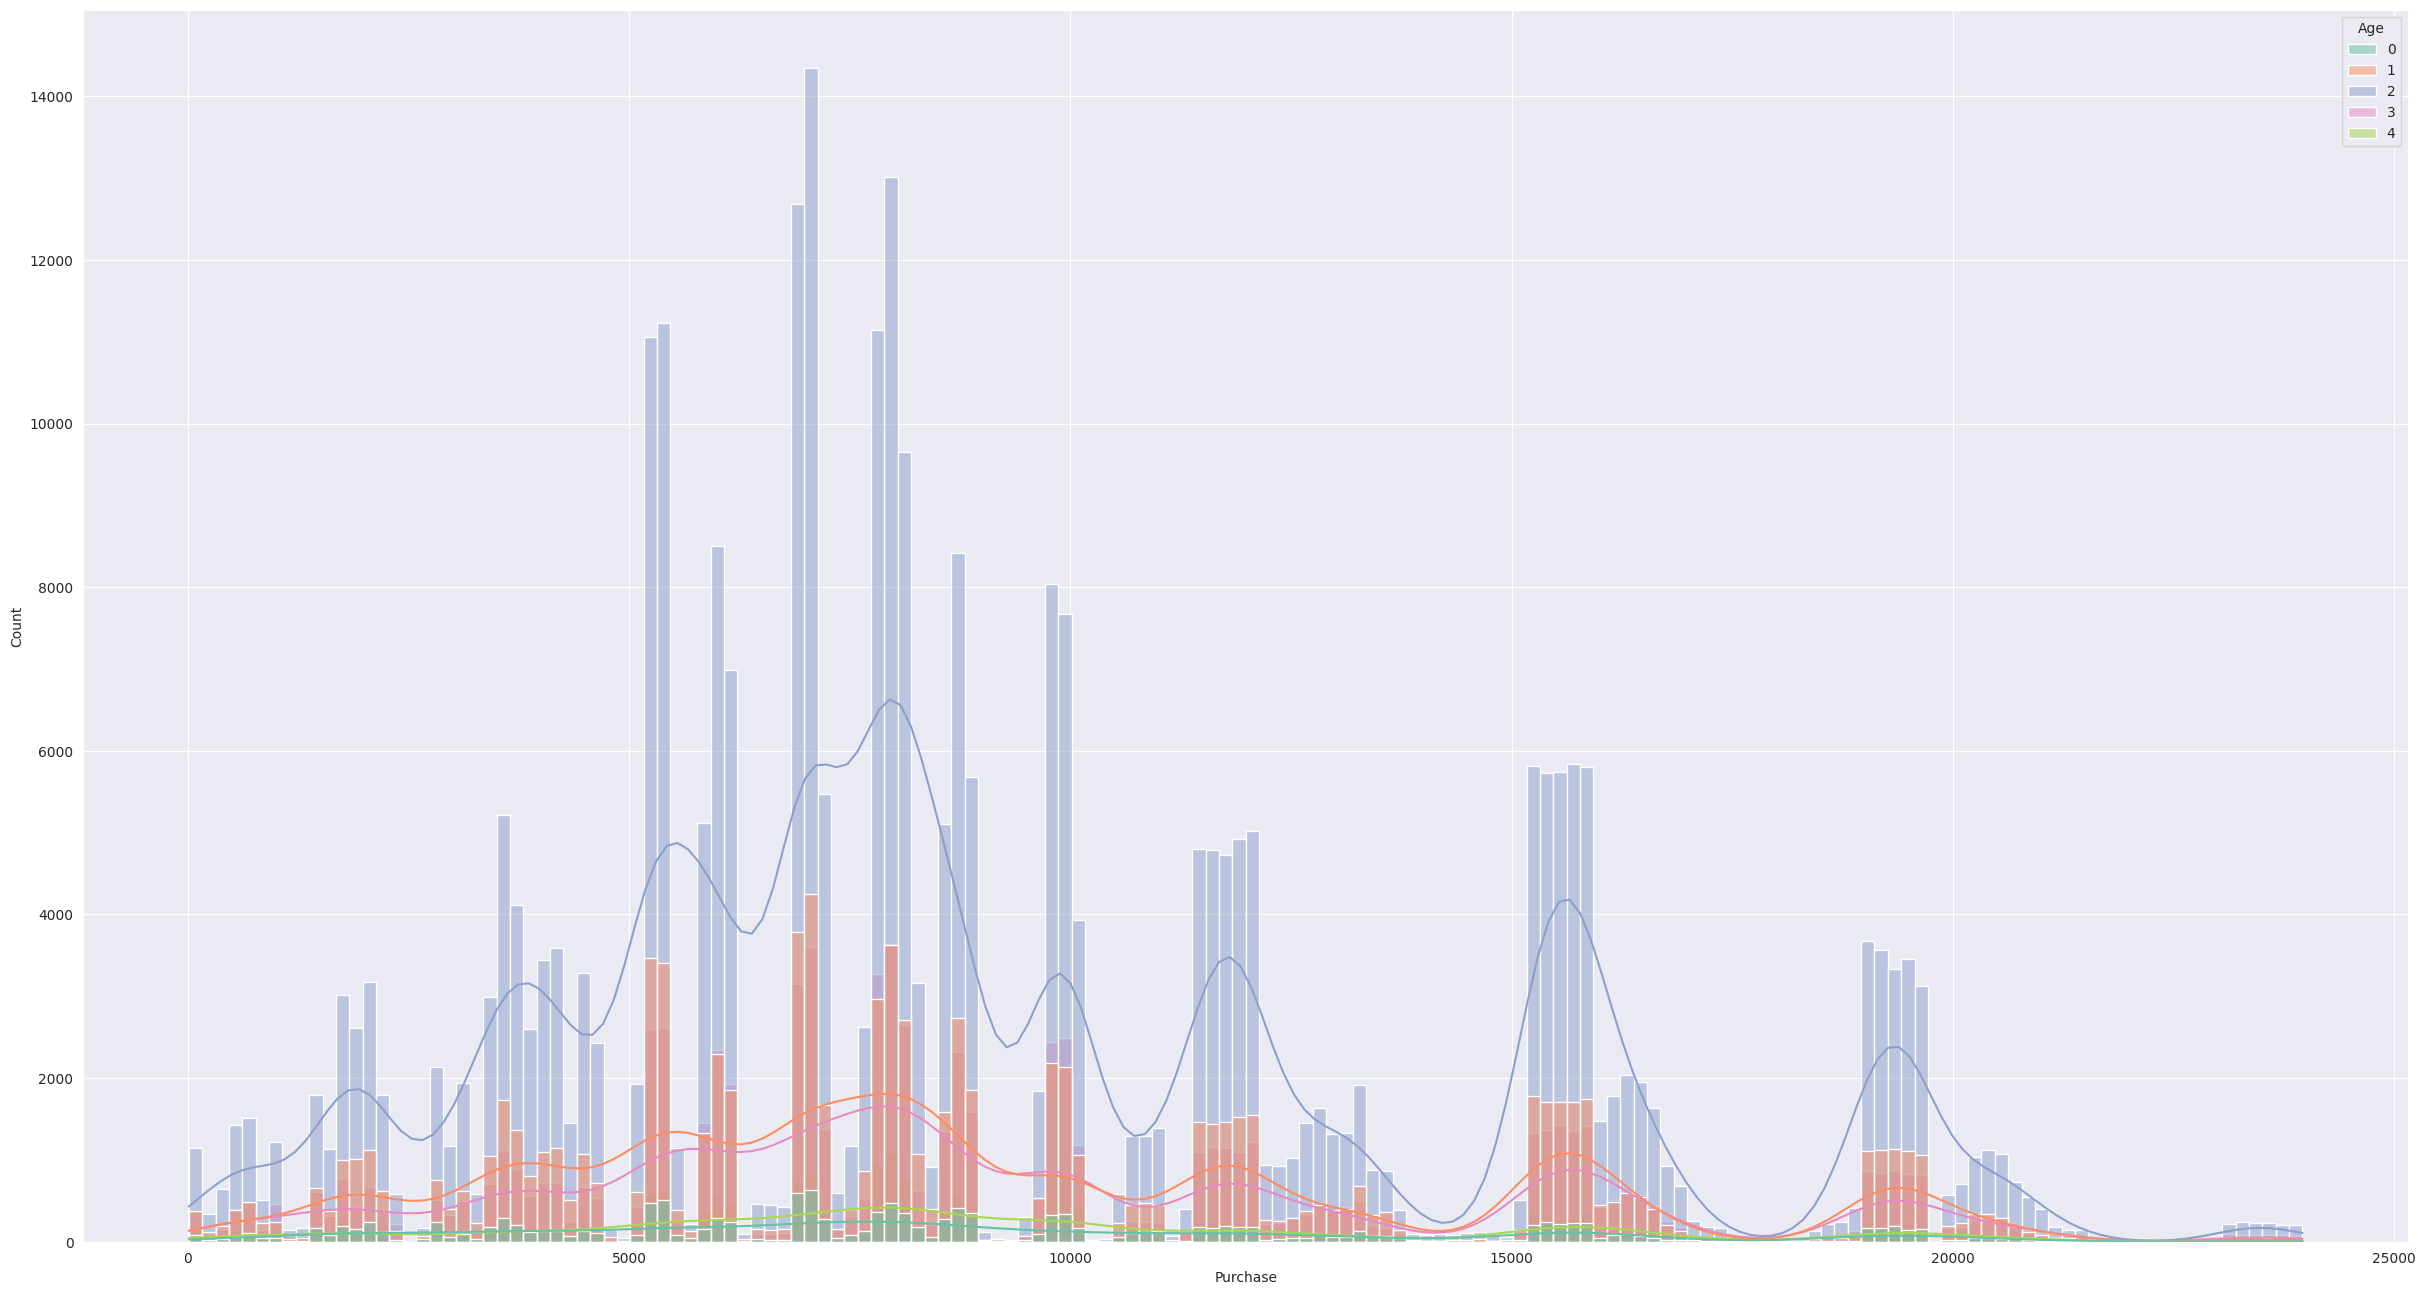

In [29]:
# Age vs Purchase
plt.figure(figsize = (30,16))
sns.histplot(x = 'Purchase', data = df, hue = 'Age', kde = True, palette = 'Set2')

Most of the Purchase are done in between 7000 & 8500

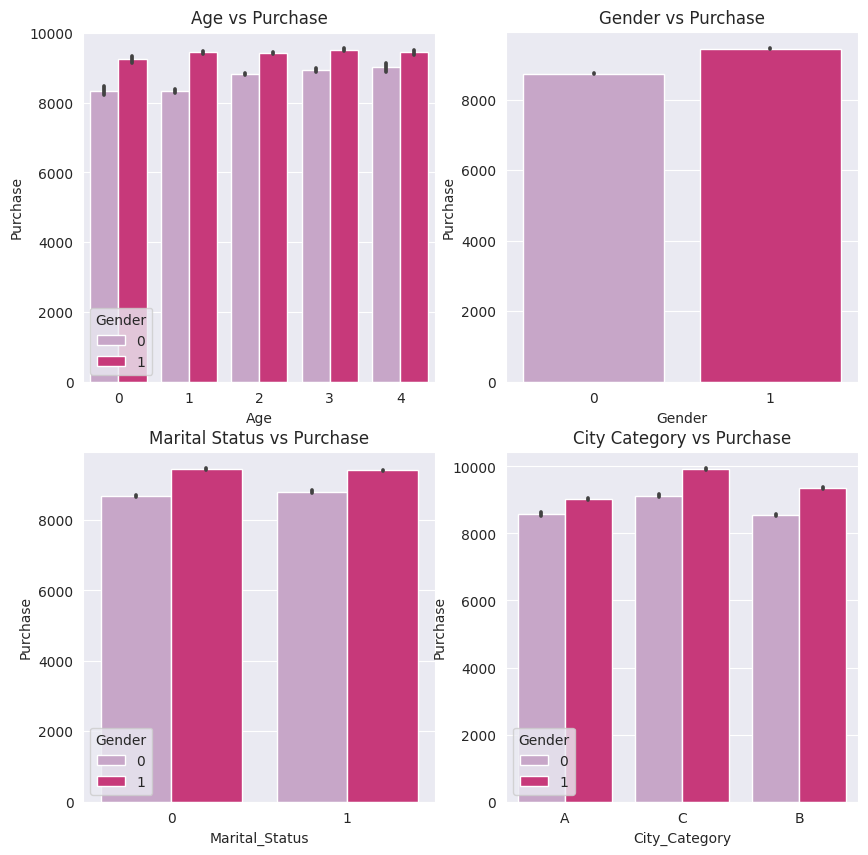

In [30]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.title('Age vs Purchase')
sns.barplot(x = 'Age', y = 'Purchase', hue = 'Gender', data = df, palette = 'PuRd')

plt.subplot(2,2,2)
plt.title('Gender vs Purchase')
sns.barplot(x = 'Gender', y = 'Purchase', data = df, palette = 'PuRd')

plt.subplot(2,2,3)
plt.title('Marital Status vs Purchase')
sns.barplot(x = 'Marital_Status', y = 'Purchase', hue = 'Gender', data = df, palette = 'PuRd')

plt.subplot(2,2,4)
plt.title('City Category vs Purchase')
sns.barplot(x = 'City_Category', y = 'Purchase', data = df, hue = 'Gender', palette = 'PuRd')

list2 = ['Age','Gender','Marital_Status','City_Category']

In above plots we can see that Men has more purchasing power than Women

<Axes: title={'center': 'Occupation vs Purchase'}, xlabel='Occupation', ylabel='Purchase'>

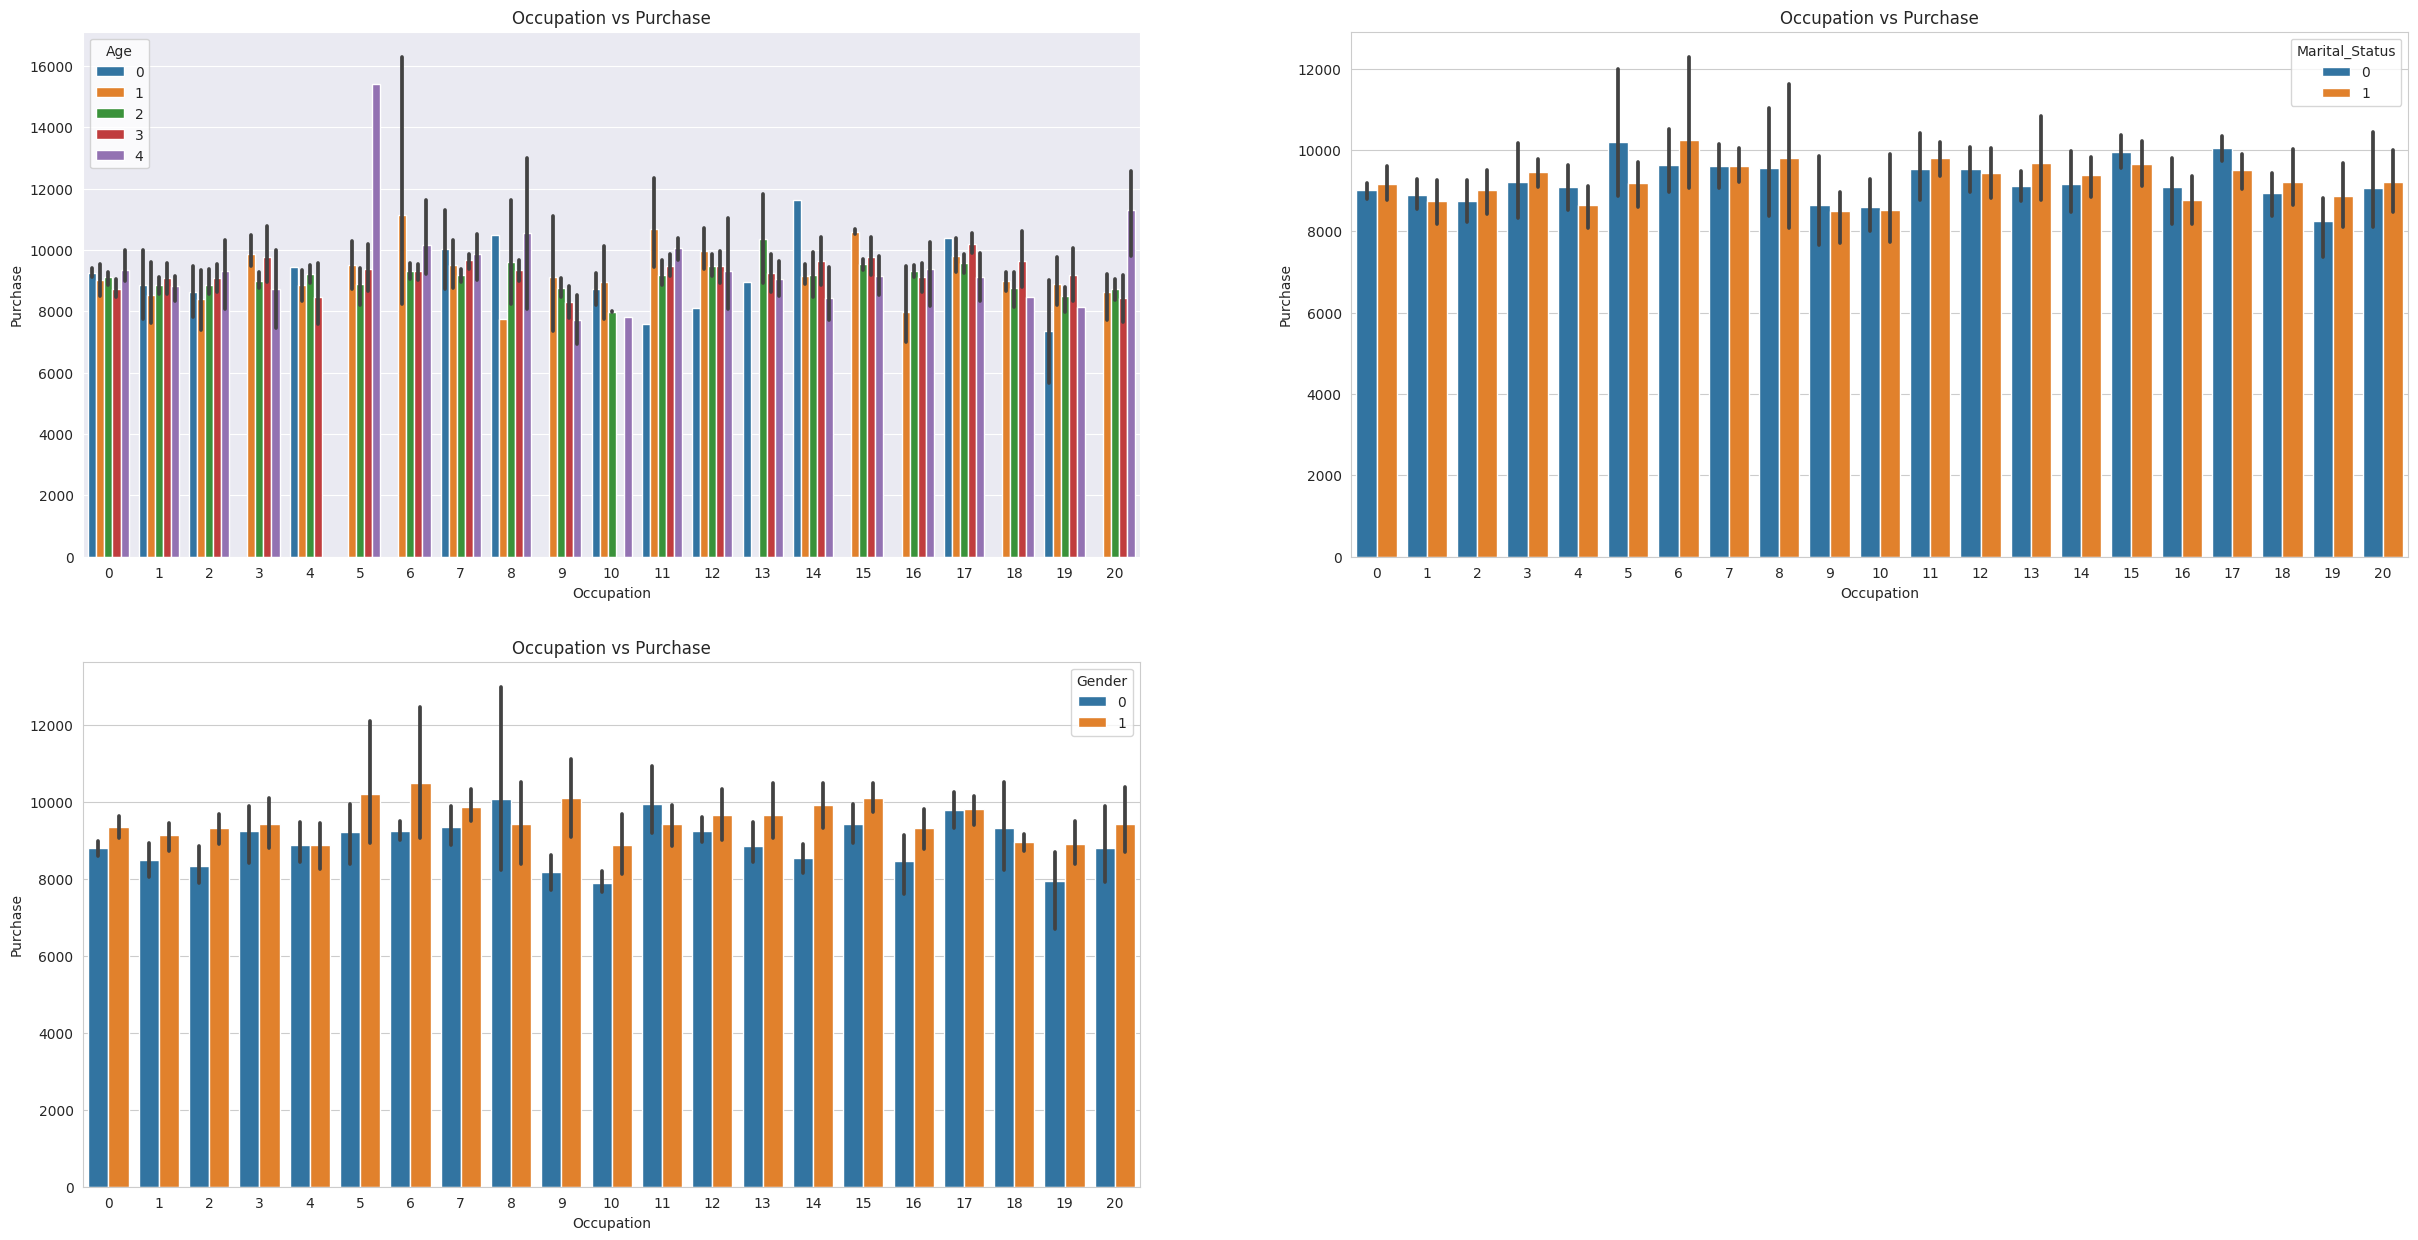

In [31]:
ds = df.groupby(['Gender','Age','Marital_Status','Occupation']).agg({'Purchase':'mean'}).reset_index()
plt.figure(figsize=(30,15))
plt.subplot(2,2,1)
plt.title('Occupation vs Purchase')
sns.set_style("whitegrid")
sns.barplot(data=ds,y='Purchase',x='Occupation',hue='Age')

plt.subplot(2,2,2)
plt.title('Occupation vs Purchase')
sns.set_style("whitegrid")
sns.barplot(data=ds,y='Purchase',x='Occupation',hue='Marital_Status')

plt.subplot(2,2,3)
plt.title('Occupation vs Purchase')
sns.set_style("whitegrid")
sns.barplot(data=ds,y='Purchase',x='Occupation',hue='Gender')


1. Age with 55+ (60) and having occupation 5 purchase more
2. both married and unmarried people having approx equal puchase amount but occupation 17purchase more in both marital status
3. Female having occupation 8 and Male with occupation 6 purchase more

'Product vs Purchase'

<Axes: title={'center': 'Product3 vs Purchase'}, xlabel='Product3', ylabel='Purchase'>

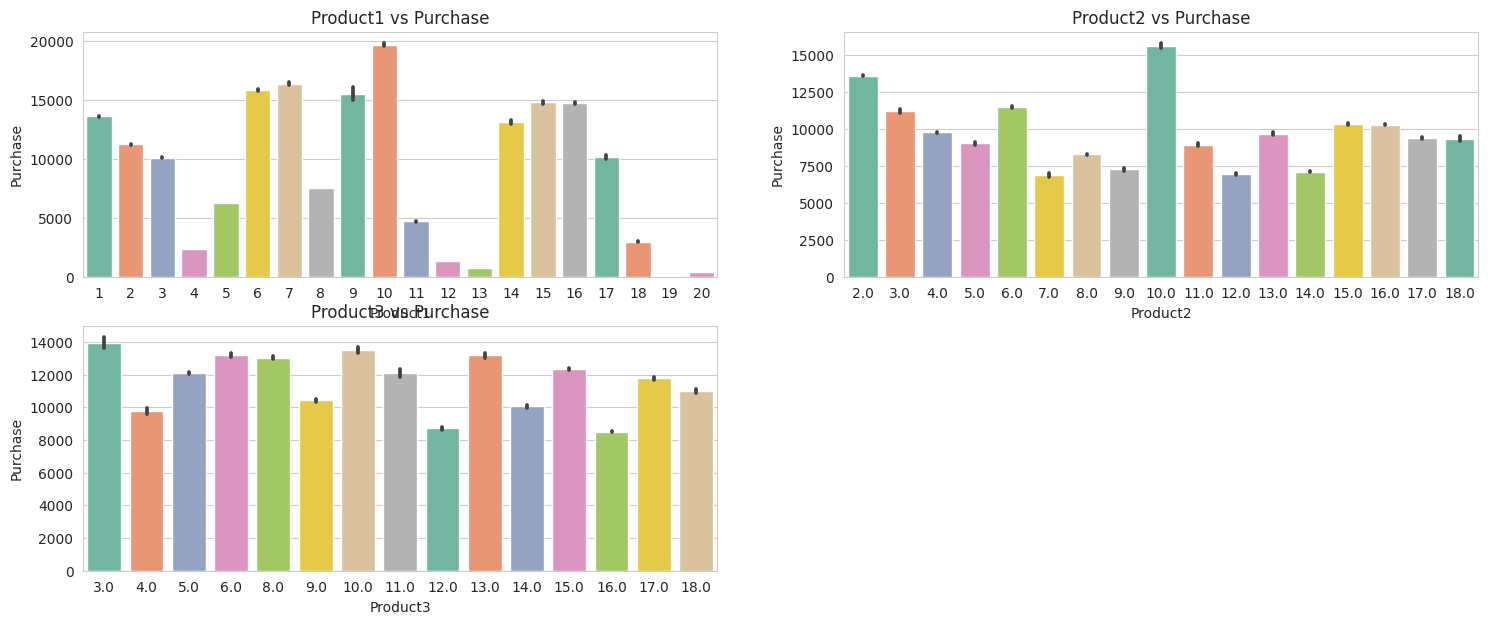

In [32]:
plt.figure(figsize = (18,7))
plt.subplot(2,2,1)
plt.title('Product1 vs Purchase')
sns.barplot(x = 'Product1', y = 'Purchase', data = df, palette = 'Set2')

plt.subplot(2,2,2)
plt.title('Product2 vs Purchase')
sns.barplot(x = 'Product2', y = 'Purchase', data = df, palette = 'Set2')

plt.subplot(2,2,3)
plt.title('Product3 vs Purchase')
sns.barplot(x = 'Product3', y = 'Purchase', data = df, palette = 'Set2')

Product Category vs Other

<Axes: xlabel='Product3', ylabel='count'>

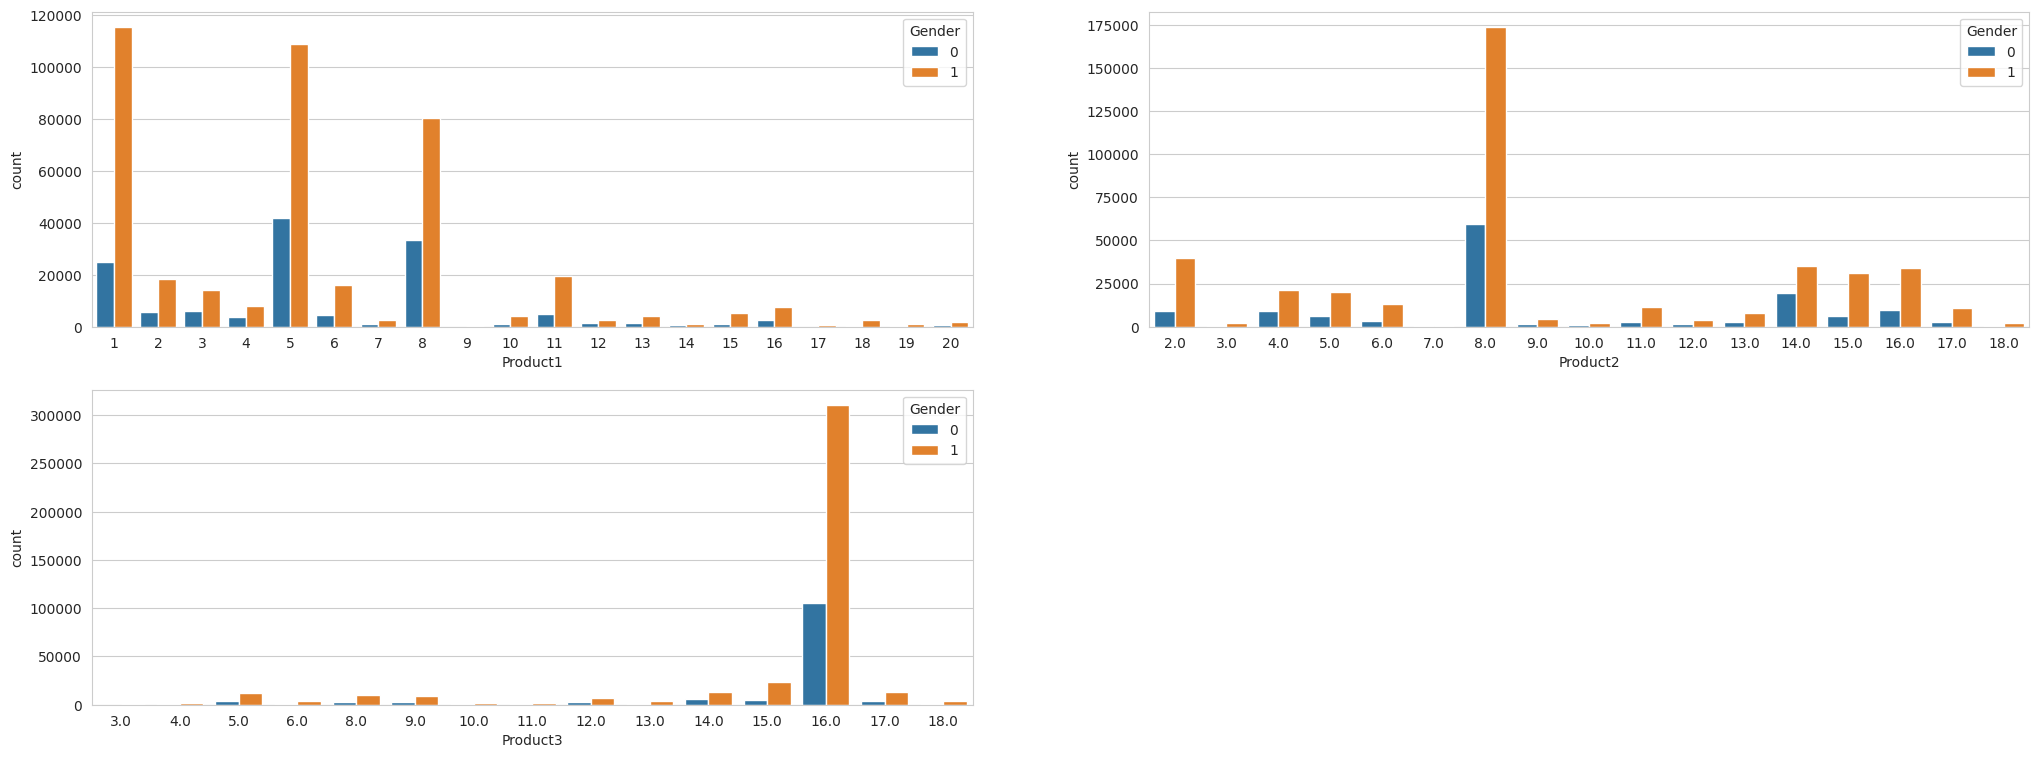

In [33]:
plt.figure(figsize=(25,9))
plt.subplot(2,2,1)
sns.set_style("whitegrid")
sns.countplot(data=df,x='Product1',hue='Gender')

plt.subplot(2,2,2)
sns.set_style("whitegrid")
sns.countplot(data=df,x='Product2',hue='Gender')

plt.subplot(2,2,3)
sns.set_style("whitegrid")
sns.countplot(data=df,x='Product3',hue='Gender')

1. Male customer purchase more product of category 1 and female purchase product category 5
2. Male customer purchase more product of category 8 and female purchase product category 14
3. both purchase product category 16

<Axes: xlabel='Product3', ylabel='count'>

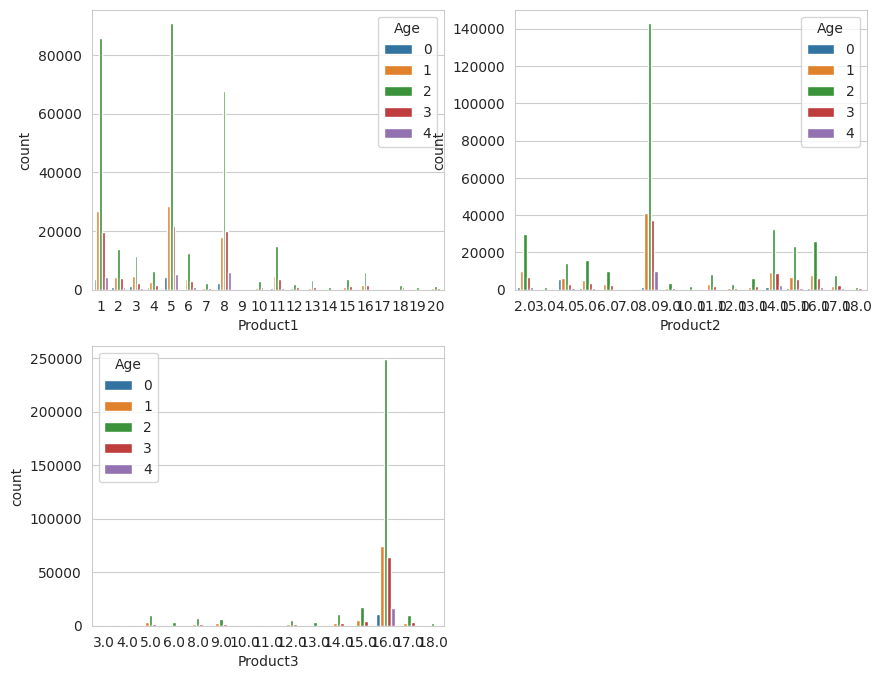

In [34]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.set_style("whitegrid")
sns.countplot(data=df,x='Product1',hue='Age')

plt.subplot(2,2,2)
sns.set_style("whitegrid")
sns.countplot(data=df,x='Product2',hue='Age')

plt.subplot(2,2,3)
sns.set_style("whitegrid")
sns.countplot(data=df,x='Product3',hue='Age')

1. Age group 26-35 (30.5) purchase more product category 5
2. Age group 26-35 (30.5) purchase more product category 8
3. Age group 26-35 (30.5) purchase more product category 16

<Axes: xlabel='Product3', ylabel='count'>

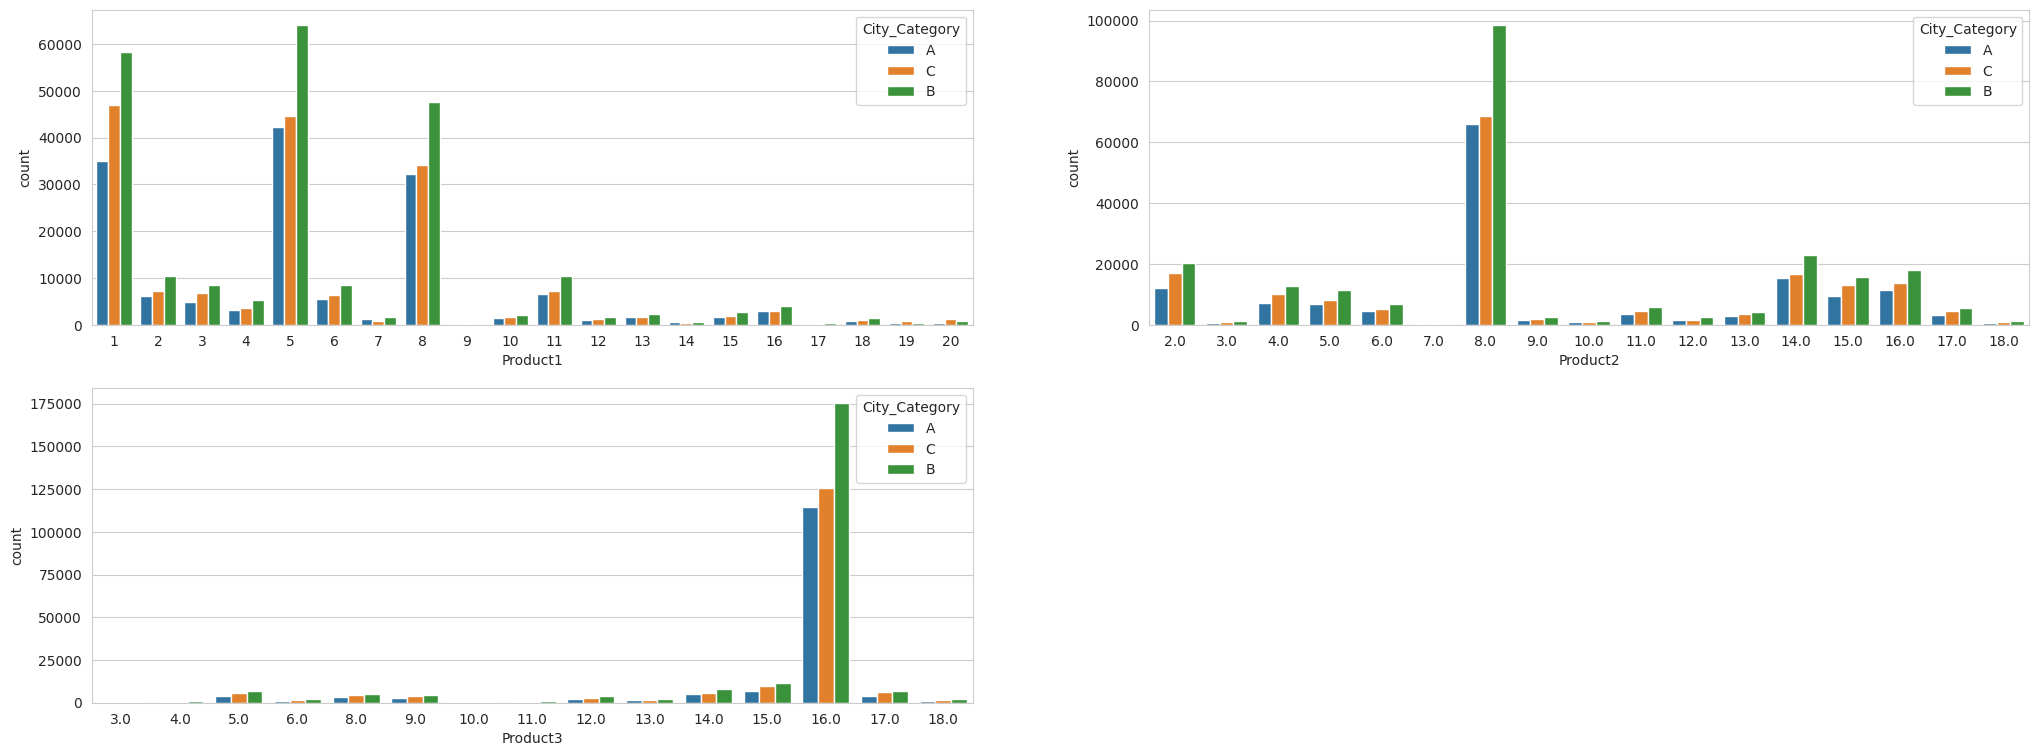

In [35]:
plt.figure(figsize=(25,9))
plt.subplot(2,2,1)
sns.set_style("whitegrid")
sns.countplot(data=df,x='Product1',hue='City_Category')

plt.subplot(2,2,2)
sns.set_style("whitegrid")
sns.countplot(data=df,x='Product2',hue='City_Category')

plt.subplot(2,2,3)
sns.set_style("whitegrid")
sns.countplot(data=df,x='Product3',hue='City_Category')

1. City B purchase more product of 5
2. City B purchase more product of 8
3. City B purchase more product of 16

<Axes: xlabel='Product3', ylabel='count'>

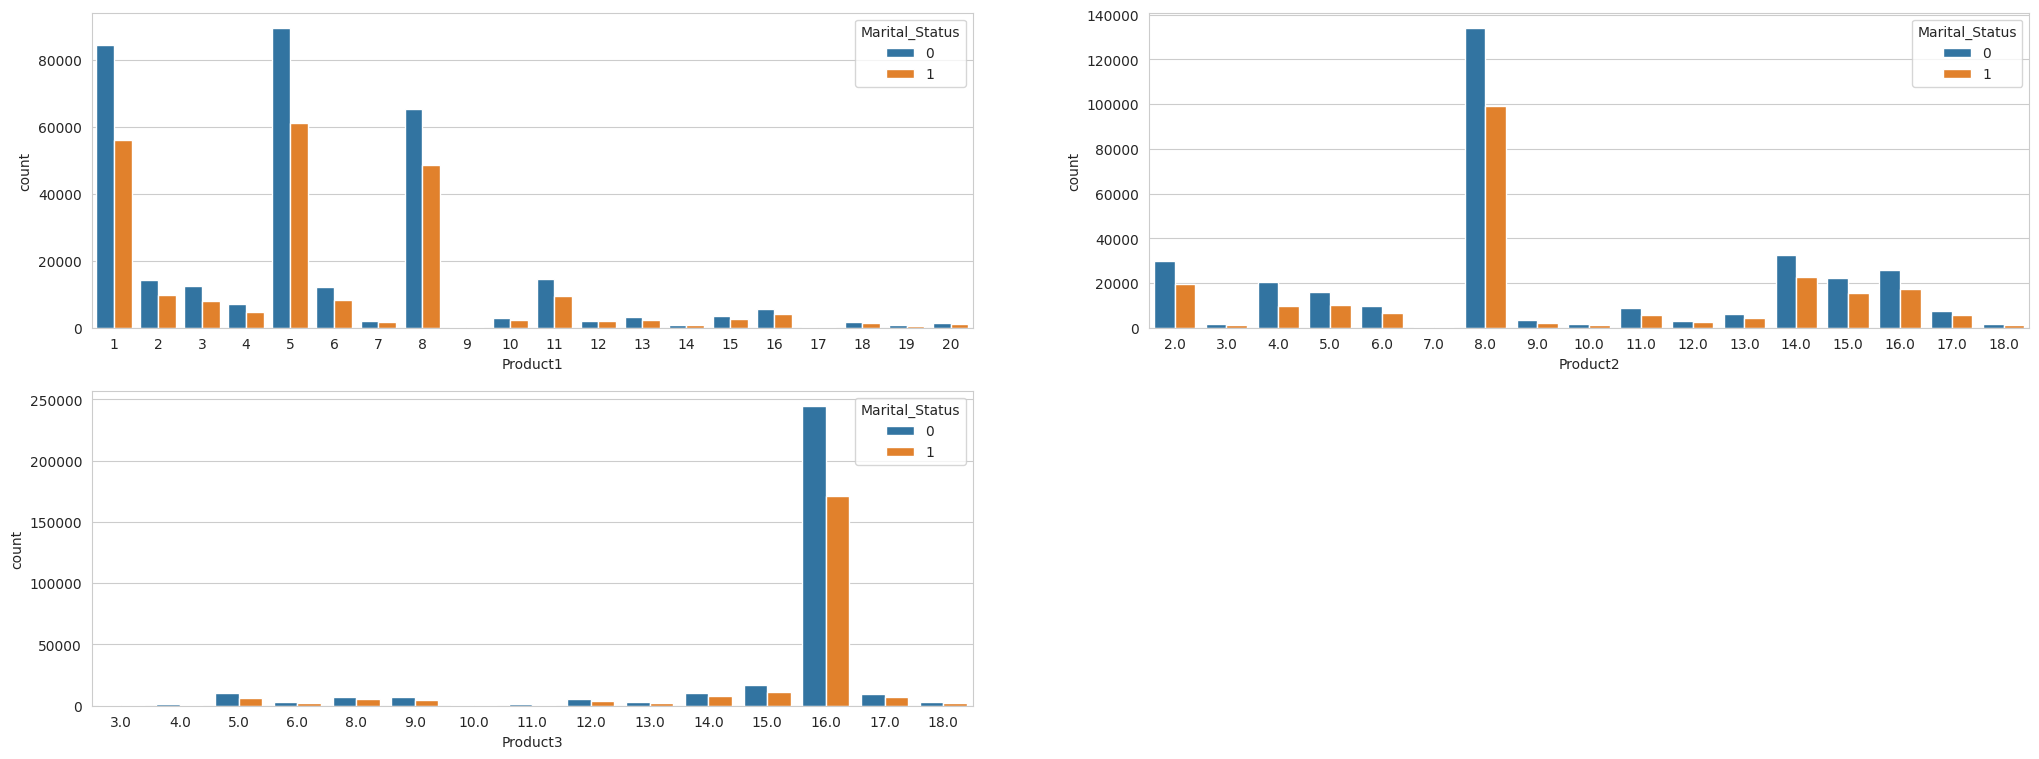

In [36]:
plt.figure(figsize=(25,9))
plt.subplot(2,2,1)
sns.set_style("whitegrid")
sns.countplot(data=df,x='Product1',hue='Marital_Status')

plt.subplot(2,2,2)
sns.set_style("whitegrid")
sns.countplot(data=df,x='Product2',hue='Marital_Status')

plt.subplot(2,2,3)
sns.set_style("whitegrid")
sns.countplot(data=df,x='Product3',hue='Marital_Status')

1. Both Married and unmarried people purchase more product of 5
2. Both Married and unmarried people purchase more product of 8
3. Both Married and unmarried people purchase more product of 16

<Axes: xlabel='City_Category', ylabel='count'>

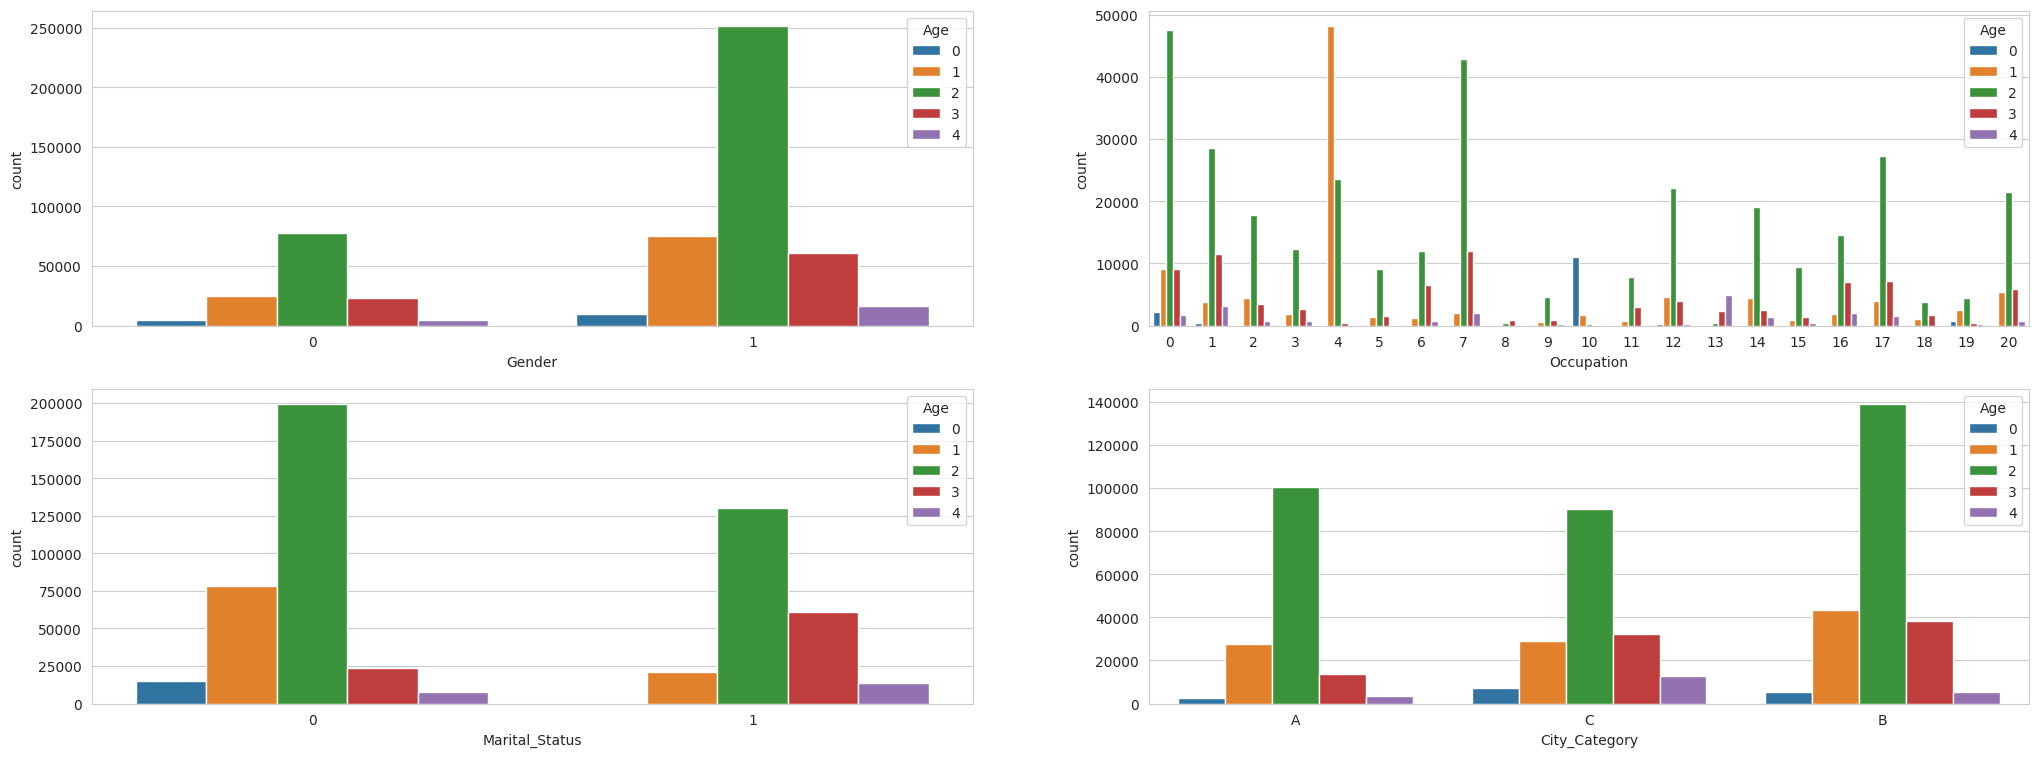

In [37]:
plt.figure(figsize=(25,9))
plt.subplot(2,2,1)
sns.set_style("whitegrid")
sns.countplot(data=df, x='Gender',hue='Age')

plt.subplot(2,2,2)
sns.set_style("whitegrid")
sns.countplot(data=df, x='Occupation',hue='Age')

plt.subplot(2,2,3)
sns.set_style("whitegrid")
sns.countplot(data=df, x='Marital_Status',hue='Age')

plt.subplot(2,2,4)
sns.set_style("whitegrid")
sns.countplot(data=df, x='City_Category',hue='Age')

1. In both Gender the age group 25-35 (30.5) are more likely to purchase product
2. age group 36-45 (40.5) with occupation 4 purchase more
3. In both marital status age group 30.5 are more
4. In all City_category age group 30.5 are more likely to purchase product

Pie Chart

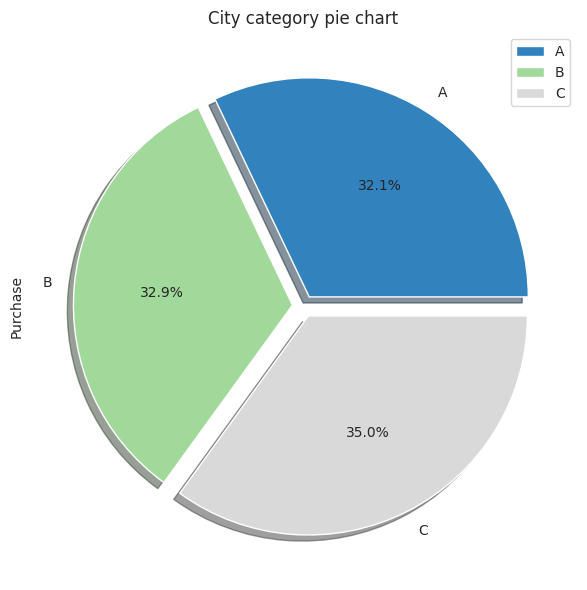

In [38]:
city= df.groupby('City_Category').agg({'Purchase':'mean'})
city.plot(subplots=True,kind='pie',figsize=(6,6),cmap='tab20c',
          shadow=True, autopct='%.1f%%',explode = (0.05,0.05,0.05),)
plt.title('City category pie chart')
plt.tight_layout()

In [39]:
top_3 = df.UserID.value_counts().keys()[:3]
print('Our Top 3 Customers / Consumers with User_ID : \n')
for i in top_3:
    print(i)

Our Top 3 Customers / Consumers with User_ID : 

1001680
1004277
1001941


In [40]:
df.head()

,UserID,Gender,Age,Occupation,City_Category,City,Marital_Status,Product1,Product2,Product3,Purchase
0,1000001,0,0,10,A,2,0,3,4.0,16.0,8370
1,1000001,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,0,0,10,A,2,0,12,4.0,16.0,1422
3,1000001,0,0,10,A,2,0,12,14.0,16.0,1057
4,1000002,1,4,16,C,4+,0,8,8.0,16.0,7969


**Conclusion**

1. Age

    ~ Most Visited are adults and least visited are children
2. Gender

    ~ Male has more count than Female
    
    ~ Also Male has more purcchase power than Female
3. City Category

    ~ People visiting the store maximum are from City Category B
    
    ~ Least People visiting the store are from City Category A
    
    ~ In least and most visited store in different cities Men has purchased more than Women 
4. City

    ~ Maximum people visiting the store are from City 1
    
    ~ Least visited is City 0
5. Marital Status

    ~ Unmarried people are visiting the store more than married people
    
    ~ In Marriage also Men are purchasing more than women
6. Products

    ~ In both Product1 and Product2 the 10th product is more purchased
    
    ~ In Product3 3rd product is more purchased than others 

# Thank You